In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from datetime import datetime
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

### TP

Comparer la méthode SVM à la méthode naive Bayes sur les 2 jeux de donnée du cour préceédents detection de langue et classification des type de données.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

NGRAM_RANGE = (1, 3)

vectorizer = CountVectorizer(
    input="content",
    analyzer="char_wb",
    ngram_range=NGRAM_RANGE,
    stop_words=None,
    binary=False
)

# l'entrée
raw_documents_vector = []

# la sortie
y_vector = []

file_name = "./data_for_datatype.txt"
with open(file_name, "rt") as f:
    for line in f:
        data = line.split(" ", maxsplit=1)
        y = data[0]
        raw_document = str(len(data[1])) + " " + data[1]
        
        # je garde les données dans des listes
        y_vector.append(y)
        raw_documents_vector.append(raw_document)
   
print("start")
vectorizer.fit(raw_documents_vector)
print("done")

start
done


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(raw_documents_vector, y_vector, train_size=0.8)

print("train :", len(Y_train))
print("test :", len(Y_test))

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


train : 295022
test : 73756


In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from datetime import datetime
import numpy as np

svc_classifier = LinearSVC()

pipelines = [
    Pipeline([("verctorizer", vectorizer), ("classifier", MultinomialNB())]),
    Pipeline([("verctorizer", vectorizer), ("classifier", svc_classifier)])
]
for i, pipeline in enumerate(pipelines):
    start = datetime.now()
    print("pipline", i)
    print("start training")
    pipeline.fit(X_train, Y_train)
    print("training done")
    print("duration", (datetime.now() - start).seconds, "secondes")
    
    start = datetime.now()
    print("start predict")
    predicted = pipeline.predict(X_test)
    print("done")
    print("duration", (datetime.now() - start).seconds, "secondes")
    
    mean = np.mean(predicted == Y_test)
    total = len(Y_test)
    correct_ones = np.sum(predicted == Y_test)
    print("total test :", total)
    print("correct :", correct_ones)
    print("proportion :", mean, float(correct_ones)/total)

pipline 0
start training
training done
duration 17 secondes
start predict
done
duration 4 secondes
total test : 73756
correct : 73578
proportion : 0.9975866370193611 0.9975866370193611
pipline 1
start training
training done
duration 42 secondes
start predict
done
duration 4 secondes
total test : 73756
correct : 73751
proportion : 0.9999322089050382 0.9999322089050382


### Avec les données de langue

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

NGRAM_RANGE = (1, 2)

vectorizer = CountVectorizer(
    input="content",
    analyzer="word",
    ngram_range=NGRAM_RANGE,
    stop_words=None,
    binary=True
)

# l'entrée
raw_documents_vector = []

# la sortie
y_vector = []

count_fr = 0
count_en = 0

for number in "123":
    file_name = "./data"+number+".txt"
    with open(file_name, "rt") as f:
        for line in f:
            y = line[0]
            raw_document = line[2:]
            
            if y == "0":
                count_en += 1 
            if y == "1":
                count_fr += 1 
            
            # je garde les données dans des listes
            y_vector.append(int(y))
            raw_documents_vector.append(raw_document)
   
print("document fr", count_fr)
vectorizer.fit(raw_documents_vector)
print("document en", count_en)

document fr 7813


KeyboardInterrupt: 

In [ ]:
# on créé une instance du classifier
clf = MultinomialNB()
pipelines = [Pipeline(
    [
        ("vectorizer", vectorizer),
        ("clf", clf)
    ]
)]

# on divise nos donnée en 2 population: training/test
X_train, X_test, Y_train, Y_test = train_test_split(raw_documents_vector, y_vector, train_size=0.8)

print("train :", len(Y_train))
print("test :", len(Y_test))

for i, pipeline in enumerate(pipelines):
    start = datetime.now()
    print("pipline", i)
    print("start training")
    pipeline.fit(X_train, Y_train)
    print("training done")
    print("duration", (datetime.now() - start).seconds, "secondes")
    
    start = datetime.now()
    print("start predict")
    predicted = pipeline.predict(X_test)
    print("done")
    print("duration", (datetime.now() - start).seconds, "secondes")
    
    mean = np.mean(predicted == Y_test)
    total = len(Y_test)
    correct_ones = np.sum(predicted == Y_test)
    print("total test :", total)
    print("correct :", correct_ones)
    print("proportion :", mean, float(correct_ones)/total)

### TP : Les iris

In [2]:
import seaborn as sn
import pandas as pd

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


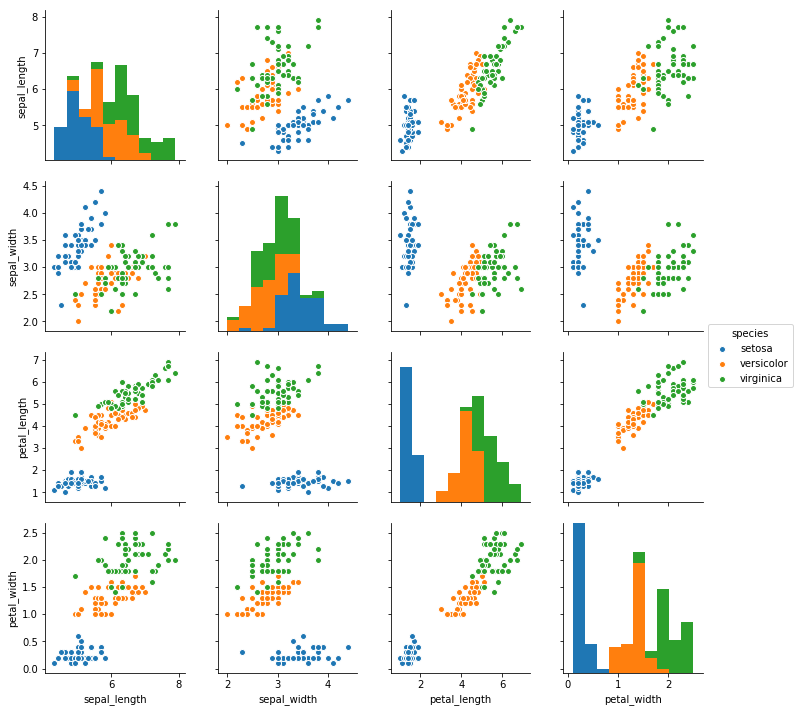

In [7]:
sn.pairplot(df, hue="species")

In [3]:
#on ne concidere que 2 dimension
data = df [["petal_length", "petal_width", "species"]]
# on garde uniquement 2 class
data = data.loc[data["species"] != "virginica"]

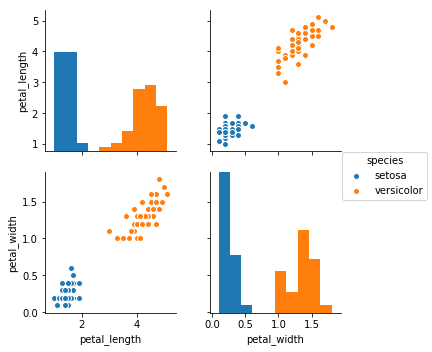

In [4]:
sn.pairplot(data, hue="species")

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


--------------------------------------------------
pipline multinomial Naive Bayes
start training
training done
duration 0 secondes
start predict
done
duration 0 secondes
total test : 30
correct : 15
proportion : 0.5
--------------------------------------------------
pipline gaussian Naive Bayes
start training
training done
duration 0 secondes
start predict
done
duration 0 secondes
total test : 30
correct : 30
proportion : 1.0
--------------------------------------------------
pipline Linear SVC
start training
training done
duration 0 secondes
start predict
done
duration 0 secondes
total test : 30
correct : 30
proportion : 1.0
--------------------------------------------------
pipline SVC
start training
training done
duration 0 secondes
start predict
done
duration 0 secondes
total test : 30
correct : 30
proportion : 1.0
--------------------------------------------------
pipline KNN
start training
training done
duration 0 secondes
start predict
done
duration 0 secondes
total test : 30
c

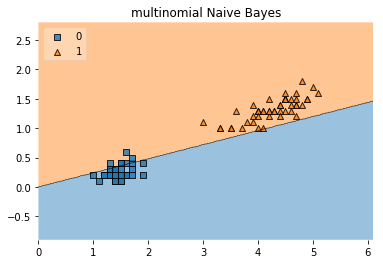

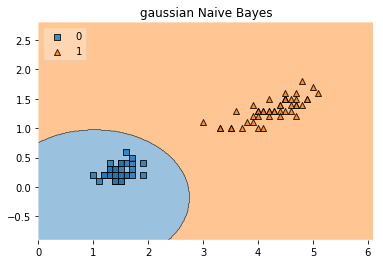

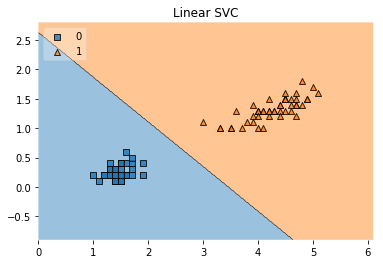

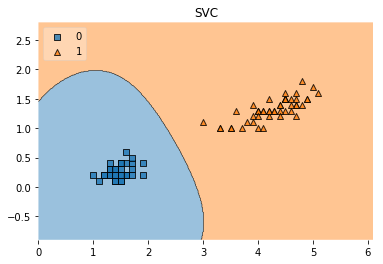

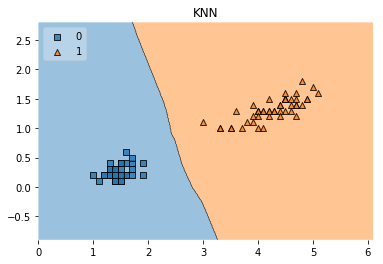

In [17]:
# on test le naive bayes et les SVM

pipelines = [
    Pipeline([("multinomial Naive Bayes", MultinomialNB())]),
    Pipeline([("gaussian Naive Bayes", GaussianNB())]),
    Pipeline([("Linear SVC", LinearSVC())]),
    Pipeline([("SVC", SVC())]),
    Pipeline([("KNN", KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree"))])
]

# on divise nos donnée en 2 population: training/test
X_train, X_test, Y_train, Y_test = train_test_split(
    data[["petal_length", "petal_width"]], data["species"], train_size=0.7, shuffle=True)

X = data[["petal_length", "petal_width"]].values
Y = data["species"].values
Y_as_int = np.empty(shape= Y.shape, dtype=int)
for i, value in enumerate(Y):
    Y_as_int[i] = 0 if value == "setosa" else 1

for i, pipeline in enumerate(pipelines):
    print("-"*50)
    start = datetime.now()
    pipeline_name = pipeline.steps[0][0]
    print("pipline", pipeline_name)
    print("start training")
    pipeline.fit(X_train, Y_train)
    print("training done")
    print("duration", (datetime.now() - start).seconds, "secondes")
    
    start = datetime.now()
    print("start predict")
    predicted = pipeline.predict(X_test)
    print("done")
    print("duration", (datetime.now() - start).seconds, "secondes")
    
    clf = pipeline.steps[0][1]
    fig = plt.figure()
    plt.title(pipeline_name)
    pipeline.fit(X, Y_as_int)
    plot_decision_regions(X=X, y=Y_as_int, clf=clf, legend=2)
    
    mean = np.mean(predicted == Y_test)
    total = len(Y_test)
    correct_ones = np.sum(predicted == Y_test)
    print("total test :", total)
    print("correct :", correct_ones)
    print("proportion :", mean)

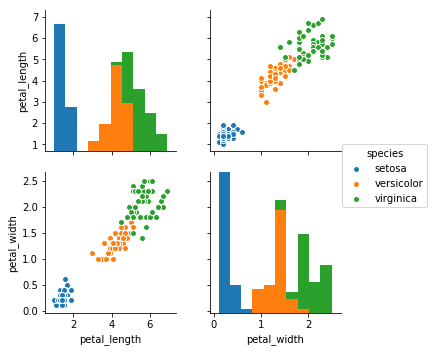

In [24]:
data = df [["petal_length", "petal_width", "species"]]
sn.pairplot(data, hue="species")

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


--------------------------------------------------
pipline multinomial Naive Bayes
start training
training done
duration 0 secondes
start predict
done
duration 0 secondes
total test : 45
correct : 9
proportion : 0.2
--------------------------------------------------
pipline gaussian Naive Bayes
start training
training done
duration 0 secondes
start predict
done
duration 0 secondes
total test : 45
correct : 40
proportion : 0.8888888888888888
--------------------------------------------------
pipline Linear SVC
start training
training done
duration 0 secondes
start predict
done
duration 0 secondes
total test : 45
correct : 39
proportion : 0.8666666666666667
--------------------------------------------------
pipline SVC
start training
training done
duration 0 secondes
start predict
done
duration 0 secondes
total test : 45
correct : 40
proportion : 0.8888888888888888
--------------------------------------------------
pipline KNN
start training
training done
duration 0 secondes
start predic

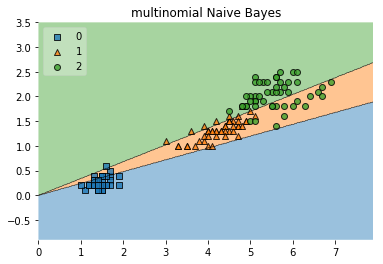

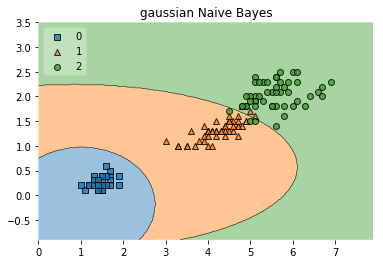

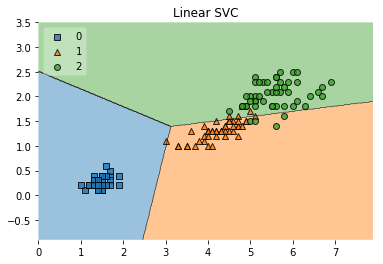

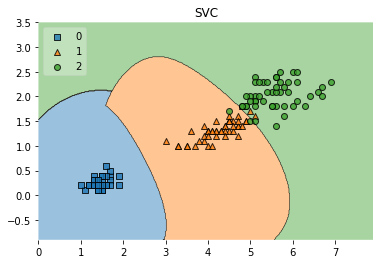

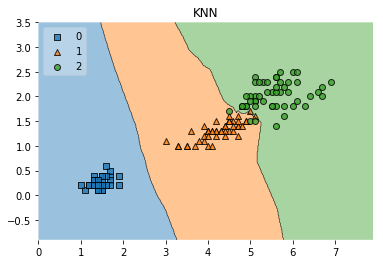

In [26]:
# on test le naive bayes et les SVM

pipelines = [
    Pipeline([("multinomial Naive Bayes", MultinomialNB())]),
    Pipeline([("gaussian Naive Bayes", GaussianNB())]),
    Pipeline([("Linear SVC", LinearSVC())]),
    Pipeline([("SVC", SVC())]),
    Pipeline([("KNN", KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree"))])
]

# on divise nos donnée en 2 population: training/test
X_train, X_test, Y_train, Y_test = train_test_split(
    data[["petal_length", "petal_width"]], data["species"], train_size=0.7, shuffle=True)

X = data[["petal_length", "petal_width"]].values
Y = data["species"].values
Y_as_int = np.empty(shape= Y.shape, dtype=int)
for i, value in enumerate(Y):
    if value == "setosa":
        Y_as_int[i] = 0
    elif value == "versicolor":
        Y_as_int[i] = 1
    else:
        Y_as_int[i] = 2

for i, pipeline in enumerate(pipelines):
    print("-"*50)
    start = datetime.now()
    pipeline_name = pipeline.steps[0][0]
    print("pipline", pipeline_name)
    print("start training")
    pipeline.fit(X_train, Y_train)
    print("training done")
    print("duration", (datetime.now() - start).seconds, "secondes")
    
    start = datetime.now()
    print("start predict")
    predicted = pipeline.predict(X_test)
    print("done")
    print("duration", (datetime.now() - start).seconds, "secondes")
    
    clf = pipeline.steps[0][1]
    fig = plt.figure()
    plt.title(pipeline_name)
    pipeline.fit(X, Y_as_int)
    plot_decision_regions(X=X, y=Y_as_int, clf=clf, legend=2)
    
    mean = np.mean(predicted == Y_test)
    total = len(Y_test)
    correct_ones = np.sum(predicted == Y_test)
    print("total test :", total)
    print("correct :", correct_ones)
    print("proportion :", mean)